In [1]:
import pandas as pd

#Read Excel file and get insight
df12 = pd.read_excel('COOP4230_DS_PROJECT_DATA_12.xlsx', engine='openpyxl')
df12.head(5)

,PeriodOrder,CustomerId,ValueBasedSegment,ProfitSegment,YearlyIncome,AvgUsdAumL3M,AvgUsdAumL6M,SumUsdAum,MaxUsdAumL24M,AvgDemandDepositTrxUsdAmountL6M,...,AvgBranchTrxNumL6M,SumBranchTrxNumLM,SumCcIvrTrxNumL3M,SumCcIvrTrxNumL6M,SumDemandDepositTrxNumL3M,SumDemandDepositTrxNumL6M,BonusCampaignPromiseFlag,ClosedCreditCardFlag,ValidationFlag,ChurnFlag
0,12,6B93AE32-CC94-4225-93A6-4B4E4FE3ED38,X,D,0.0,0,0,0.0,50.0,0,...,0.28,NaN,0,0,0.0,0.0,0,0,0,0.0
1,12,23F308B0-0A29-4FC7-A4BB-FFAB461643EC,X,D,150.0,340,310,400.0,750.0,1370,...,0,NaN,0,0,2.0,2.0,0,0,0,0.0
2,12,14C523CD-12D8-435B-8BB3-10DB40C3EAA1,X,D,10.0,10,10,0.0,140.0,1040,...,0.55,NaN,0,0,4.0,8.0,0,0,0,0.0
3,12,35B56EC7-903C-473A-883A-75CDD5F3F0B0,X,C,770.0,0,0,0.0,790.0,340,...,0,NaN,0,0,6.0,6.0,0,0,0,0.0
4,12,3A7D8BB6-5D84-4401-AF57-5BD58DFC1868,X,B,850.0,0,0,0.0,0.0,150,...,0,NaN,0,0,6.0,6.0,0,0,0,0.0


In [2]:
#Check corralation
corr = df12.corr()
corr
corr["ChurnFlag"].sort_values(ascending=False)

#Check NaN values from dataset
df12.isna().sum().sort_values(ascending=False)

SumClosedAutoBillPaymentOrderNumLM    65999
SumNewAutoBillPaymentOrderNumLM       65536
SumInboundTrxNumLM                    65278
SumFxDemandDepositTrxUsdAmountLM      64210
SumInboundNumLM                       62269
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

### Validation Set created

In [3]:
dfvalidation = df12.loc[df12['ValidationFlag'] == 1]
dfvalidation['ValidationFlag']

9        1
14       1
15       1
17       1
22       1
        ..
65971    1
65975    1
65985    1
65993    1
65999    1
Name: ValidationFlag, Length: 11000, dtype: int64

## Train set created

In [4]:
dfmodel = df12.loc[df12['ValidationFlag'] == 0]
#null values
dfmodel.isna().sum().sort_values(ascending=False)

SumClosedAutoBillPaymentOrderNumLM    54999
SumNewAutoBillPaymentOrderNumLM       54608
SumInboundTrxNumLM                    54388
SumFxDemandDepositTrxUsdAmountLM      53496
SumInboundNumLM                       51881
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

In [5]:
nullIncomes = dfmodel.loc[dfmodel['YearlyIncome'].isna()]
nullIncomes

dfmodel = dfmodel[dfmodel['YearlyIncome'].notna()]
dfmodel.isna().sum().sort_values(ascending=False)

SumClosedAutoBillPaymentOrderNumLM    54970
SumNewAutoBillPaymentOrderNumLM       54579
SumInboundTrxNumLM                    54359
SumFxDemandDepositTrxUsdAmountLM      53467
SumInboundNumLM                       51852
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

## Dfmodel Refactored 

Unnecessary columns with a high number of null values ​​were dropped.

In [6]:
dfmodel = dfmodel.drop(["SumClosedAutoBillPaymentOrderNumLM",
"SumNewAutoBillPaymentOrderNumLM",
"SumInboundTrxNumLM"              ,               
"SumFxDemandDepositTrxUsdAmountLM" ,              
"SumInboundNumLM"                   ,             
"SumAutoBillPaymentNumLM",
"SumBranchTrxUsdAmountLM" ,                       
"SumBranchTrxNumLM"        ,                      
"SumIncomingEftNumLM"       ,                     
"SumEftNumLM"                ,                    
"SumInstallmentLoanInstallmentBalanceLM"         ,
"SumInstallmentLoanOpeningBalanceUsdLM"          ,
"SumInstallmentLoanCurrentBalanceUsdLM",
"MaxOverdraftBalanceUsdLM"              ,         
"AvgEftNumL3M"                           ,        
"AvgCreditCardEftUsdAmountL3M"            ,       
"AvgEftNumL6M"                             ,      
"AvgCreditCardEftUsdAmountL6M"              ,     
"CreditCardUsdLimitLM"                       ,    
"SumCreditCardRevolveUsdAmountLM"             ,   
"SumCreditCardTrxNumLM"                        ,  
"SumCreditCardTrxUsdAmountLM"                   , 
"SumAtmTrxUsdAmountLM"                           ,
"SumTrDemandDepositTrxUsdAmountLM"     ], axis=1)


In [7]:
dfmodel.isna().sum().sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL6M    3479
SumDemandDepositTrxNumL3M    2935
SumUsdAum                      27
SumLoanBalanceUsdLM            27
MaxLoanBalanceL24M             18
dtype: int64

In [8]:
corr = dfmodel.corr()
corr
corr["ChurnFlag"].sort_values(ascending=False).head(5)

ChurnFlag                          1.000000
ClosedCreditCardFlag               0.044587
ClosedPayrollDurationMonthL12M     0.033348
AvgDemandDepositTrxUsdAmountL6M   -0.001728
MaxUsdAumL24M                     -0.007035
Name: ChurnFlag, dtype: float64


## NaN counts ##
27
SumUsdAum                                        
27
SumLoanBalanceUsdLM                              
18
MaxLoanBalanceL24M                               
18
MaxUsdAumL24M                                    


These rows dropped

In [9]:
nullIncomes = dfmodel.loc[dfmodel['SumUsdAum'].isna()] #Son 24 aydaki tüm varlıkların usd toplamı vadeli vadesiz
nullIncomes

#Current shape of dataframe
print('Current shape of dataframe' , dfmodel.shape)

#Shape of dataframe after drop operation
dfmodel = dfmodel.drop(index= nullIncomes.index, axis= 0)
print('Shape of dataframe after drop operation' , dfmodel.shape)

Current shape of dataframe (54971, 60)
Shape of dataframe after drop operation (54944, 60)


In [10]:
dfmodel.isna().sum().sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL6M    3479
SumDemandDepositTrxNumL3M    2935
ChurnFlag                       0
AvgInternetLoginNumL3M          0
ClosedProductNumL3M             0
dtype: int64

In [11]:
corr["SumDemandDepositTrxNumL3M"].sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL3M          1.000000
SumDemandDepositTrxNumL6M          0.929089
SumDemandDepositTrxTypeNumLM       0.856933
ActiveProductAndChannelGroupNum    0.630240
Product13OwnershipFlag             0.564592
Name: SumDemandDepositTrxNumL3M, dtype: float64

In [12]:
dfSumDemandDepositTrxNumL3M = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL3M'] == 0]
nullIncomes = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL3M'].isna()]

In [13]:
nullIncomes2 = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL6M'].isna()] #validation dataset

print('Shape of current dfmodel' , dfmodel.shape)
testDataframe = dfmodel.drop(index= nullIncomes2.index, axis= 0)
nullIncomes3 = testDataframe.loc[dfmodel['SumDemandDepositTrxNumL3M'].isna()]
testDataframe = testDataframe.drop(index= nullIncomes3.index, axis= 0)
print('Shape of testdataframe' , testDataframe.shape)

Shape of current dfmodel (54944, 60)
Shape of testdataframe (50872, 60)


In [14]:
testDataframe.isna().sum().sort_values(ascending=False).head(5)

ChurnFlag                        0
ValidationFlag                   0
Product1OwnershipFlag            0
ClosedProductNumL3M              0
NewOpenProductAndChannelNumLM    0
dtype: int64

## Regression for imputation SumDemandDepositTrxNumL6M'

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

values = testDataframe[['SumDemandDepositTrxNumL3M','SumDemandDepositTrxTypeNumLM' ]]
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
inputs = pd.DataFrame(scaled)

target = testDataframe['SumDemandDepositTrxNumL6M']
target = target.to_numpy()
target = target.reshape(-1, 1)
print('real target')
print(target)
minxmaxScaler = MinMaxScaler()
newtarget = minxmaxScaler.fit_transform(target)
target = pd.DataFrame(newtarget)
print(target)


X_train, X_test, y_train, y_test = train_test_split( inputs, target, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Test set
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Real test
reversed_target2 = minxmaxScaler.inverse_transform(y_test)
print(reversed_target2)
reversed_target = minxmaxScaler.inverse_transform(y_pred)
print(reversed_target)

print('Mean Absolute Error:', metrics.mean_absolute_error(reversed_target2, reversed_target))
print('Mean Squared Error:', metrics.mean_squared_error(reversed_target2, reversed_target))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(reversed_target2, reversed_target)))

real target
[[0.]
 [2.]
 [8.]
 ...
 [4.]
 [4.]
 [2.]]
              0
0      0.000000
1      0.052632
2      0.210526
3      0.157895
4      0.157895
...         ...
50867  0.210526
50868  0.000000
50869  0.105263
50870  0.105263
50871  0.052632

[50872 rows x 1 columns]
Mean Absolute Error: 0.03654931137324324
Mean Squared Error: 0.0022705003937485576
Root Mean Squared Error: 0.047649768034572396
[[10.]
 [20.]
 [ 4.]
 ...
 [ 4.]
 [ 4.]
 [12.]]
[[ 9.26705557]
 [20.00865201]
 [ 5.09808145]
 ...
 [ 5.15611075]
 [ 5.15611075]
 [ 9.32508487]]
Mean Absolute Error: 1.3888738321832432
Mean Squared Error: 3.2786025685729183
Root Mean Squared Error: 1.8106911853137515


In [16]:
corr = testDataframe.corr()
corr["ChurnFlag"].sort_values(ascending=False).head(10)

ChurnFlag                            1.000000
ClosedCreditCardFlag                 0.040596
ClosedPayrollDurationMonthL12M       0.036551
AvgDemandDepositTrxUsdAmountL6M     -0.001801
ClosedOverdraftDurationMonthL12M    -0.005343
SumUsdAum                           -0.007413
MaxUsdAumL24M                       -0.007453
AvgFxDemandDepositTrxUsdAmountL6M   -0.007456
AvgFxDemandDepositTrxUsdAmountL3M   -0.007468
AvgUsdAumL3M                        -0.008408
Name: ChurnFlag, dtype: float64

In [60]:
sorted_data = testDataframe.reindex(sorted(testDataframe.columns), axis=1)
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [61]:
##Total product ownership calculation
poColumns = sorted_data.iloc[:, 34:49]

In [62]:
poColumns.head(10)

,Product10OwnershipFlag,Product11OwnershipFlag,Product12OwnershipFlag,Product13OwnershipFlag,Product14OwnershipFlag,Product15OwnershipFlag,Product1OwnershipFlag,Product2OwnershipFlag,Product3OwnershipFlag,Product4OwnershipFlag,Product5OwnershipFlag,Product6OwnershipFlag,Product7OwnershipFlag,Product8OwnershipFlag,Product9OwnershipFlag
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,2,1,0,0,0,0,2,0,2,0,0
2,0,0,0,1,2,0,0,0,0,0,0,0,1,1,0
3,0,0,0,2,2,2,2,0,0,2,2,0,1,2,0
4,0,0,0,2,0,2,0,0,0,0,0,0,1,0,0
5,0,0,0,1,2,1,0,0,0,0,0,0,2,0,0
6,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0
7,0,0,0,1,1,1,0,0,0,0,2,0,2,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
10,0,0,0,0,2,2,2,0,0,0,2,0,2,0,0


In [63]:
totalProductOwnership = poColumns.T[poColumns.T > 0].count()

In [64]:
print(totalProductOwnership)

0        2
1        5
2        4
3        8
4        3
        ..
65994    5
65995    2
65996    4
65997    4
65998    2
Length: 50872, dtype: int64


In [65]:
sorted_data['TotalProductOwnership'] = totalProductOwnership

In [66]:
print(sorted_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [67]:
sorted_data = sorted_data.drop(poColumns, axis=1)
print(sorted_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [68]:
sorted_data['TotalProductOwnership']

0        2
1        5
2        4
3        8
4        3
        ..
65994    5
65995    2
65996    4
65997    4
65998    2
Name: TotalProductOwnership, Length: 50872, dtype: int64

In [69]:
corr = sorted_data.corr()
corr["ChurnFlag"].sort_values(ascending=False)

ChurnFlag                                      1.000000
ClosedCreditCardFlag                           0.040596
ClosedPayrollDurationMonthL12M                 0.036551
AvgDemandDepositTrxUsdAmountL6M               -0.001801
ClosedOverdraftDurationMonthL12M              -0.005343
SumUsdAum                                     -0.007413
MaxUsdAumL24M                                 -0.007453
AvgFxDemandDepositTrxUsdAmountL6M             -0.007456
AvgFxDemandDepositTrxUsdAmountL3M             -0.007468
AvgUsdAumL3M                                  -0.008408
AvgUsdAumL6M                                  -0.009405
YearlyIncome                                  -0.010426
ClosedCreditCardDurationMonthL12M             -0.016579
BonusCampaignPromiseFlag                      -0.021875
SumCcIvrTrxNumL3M                             -0.023013
SumCcIvrTrxNumL6M                             -0.024318
Channel1OwnershipFlag                         -0.025774
NewOpenProductAndChannelNumLM                 -0

In [71]:
sorted_data['AvgAtmTrxNumL6M'].head(50)

0                       0
1     1957-10-01 00:00:00
2                   19.49
3     2021-04-06 00:00:00
4     1957-10-01 00:00:00
5                   62.63
6                       0
7                   18.92
8                       0
10    2021-05-25 00:00:00
11    2021-12-01 00:00:00
12    1995-01-01 00:00:00
13                  50.38
16    1989-03-01 00:00:00
18                  23.66
19    2022-02-01 00:00:00
20    2021-03-10 00:00:00
21    1934-03-01 00:00:00
23                  19.76
24    1986-10-01 00:00:00
25    2014-11-01 00:00:00
26    1974-09-01 00:00:00
27    2021-04-20 00:00:00
29    1995-01-01 00:00:00
30                   0.55
32                      0
33                  13.64
34                      0
38    2029-05-01 00:00:00
39                  65.68
40                      0
41                      0
42                  30.61
44                   0.55
45    1963-08-01 00:00:00
47    1968-06-01 00:00:00
49    1969-11-01 00:00:00
50    2013-06-01 00:00:00
51          

In [91]:
def check_date_for_column(column, sorted_data):
    try:
        if column in sorted_data:
            if sorted_data[column].dtypes == 'object':
                print(column)
                for index, row in sorted_data[column].iteritems():   
                    if len(str(row)) == 19:
                        date = parse(str(row))
                        print(date)
        return
    except Exception as e:
        return

for col in sorted_data.columns:
    check_date_for_column(col, sorted_data)

AvgAtmTrxNumL6M
AvgAutoBillPaymentNumLM6
AvgBranchTrxNumL6M
AvgDemandDepositTrxNumL6M
AvgFxDemandDepositTrxNumL3M
AvgFxDemandDepositTrxNumL6M
AvgInternetLoginNumL3M
AvgInternetTrxNumL3M
AvgInternetTrxNumL6M
ClosedProductNumL3M
1933-01-01 00:00:00
1933-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1967-02-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1967-01-01 00:00:00
1933-01-01 00:00:00
1967-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
1967-01-01 00:00:00
1933-01-01 00:00:00
1933-01-01 00:00:00
CustomerId
DemandDepositBalanceDebtRatioLM6
DifDayLas

1989-03-01 00:00:00
1951-02-01 00:00:00
1941-11-01 00:00:00
1967-01-01 00:00:00
2021-07-08 00:00:00
2021-01-05 00:00:00
2022-02-01 00:00:00
1996-06-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2014-11-01 00:00:00
1939-01-01 00:00:00
2021-09-08 00:00:00
2018-04-01 00:00:00
2021-01-05 00:00:00
1963-08-01 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
2021-03-10 00:00:00
1985-05-01 00:00:00
2021-12-01 00:00:00
2021-07-08 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1981-12-01 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
2021-02-10 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
1996-06-01 00:00:00
1985-05-01 00:00:00
2021-06-03 00:00:00
2014-11-01 00:00:00
1939-01-01 00:00:00
2021-02-10 00:00:00
2024-12-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
1935-08-01 00:00:00
1996-06-01 00:00:00
2021-12-01 00:00:00


In [92]:
from dateutil.parser import parse

def transform_method(column, sorted_data):
    print(column , 'started to process')
    if column in sorted_data:
        for index, row in sorted_data[column].iteritems():     
            if len(str(row)) > 12:
                date = parse(str(row))
                if date.year == 2021:
                    row = float(str(date.day) + '.' + str(date.month))
                    sorted_data.at[index,column]= row
                else:
                    row = float(str(date.month) + '.' + str(date.year)[-2:])
                    sorted_data.at[index,column]= row
    return

liste = ['AvgBranchTrxNumL6M',
'SumNewAutoBillPaymentOrderNumLM',
'SumAutoBillPaymentNumLM',
'AvgAutoBillPaymentNumLM6',
'DemandDepositBalanceDebtRatioLM6',
'AvgAtmTrxNumL6M',
'AvgFxDemandDepositTrxNumL6M',
'AvgFxDemandDepositTrxNumL3M',
'AvgDemandDepositTrxNumL6M',
'AvgInternetTrxNumL6M',
'AvgInternetTrxNumL3M',
'AvgInternetLoginNumL3M',
'AvgEftNumL6M',
'AvgEftNumL3M',
'ClosedProductNumL3M',
'DifDayLast2FinancialTrxL12M',
]


for item in liste:
    print(item, ' started')
    transform_method(item, sorted_data)
    print(item, ' finished')

AvgBranchTrxNumL6M  started
AvgBranchTrxNumL6M started to process
AvgBranchTrxNumL6M  finished
SumNewAutoBillPaymentOrderNumLM  started
SumNewAutoBillPaymentOrderNumLM started to process
SumNewAutoBillPaymentOrderNumLM  finished
SumAutoBillPaymentNumLM  started
SumAutoBillPaymentNumLM started to process
SumAutoBillPaymentNumLM  finished
AvgAutoBillPaymentNumLM6  started
AvgAutoBillPaymentNumLM6 started to process
AvgAutoBillPaymentNumLM6  finished
DemandDepositBalanceDebtRatioLM6  started
DemandDepositBalanceDebtRatioLM6 started to process
DemandDepositBalanceDebtRatioLM6  finished
AvgAtmTrxNumL6M  started
AvgAtmTrxNumL6M started to process
AvgAtmTrxNumL6M  finished
AvgFxDemandDepositTrxNumL6M  started
AvgFxDemandDepositTrxNumL6M started to process
AvgFxDemandDepositTrxNumL6M  finished
AvgFxDemandDepositTrxNumL3M  started
AvgFxDemandDepositTrxNumL3M started to process
AvgFxDemandDepositTrxNumL3M  finished
AvgDemandDepositTrxNumL6M  started
AvgDemandDepositTrxNumL6M started to process
A

In [95]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
print(sorted_data.shape)
# fit the model
y = sorted_data['ChurnFlag']
X = sorted_data.drop(['ChurnFlag'], axis=1)
X = sorted_data.drop(['CustomerId'], axis=1)

(50872, 46)


,ActiveProductAndChannelGroupNum,AvgAtmTrxNumL6M,AvgAutoBillPaymentNumLM6,AvgBranchTrxNumL6M,AvgDemandDepositTrxNumL6M,AvgDemandDepositTrxUsdAmountL6M,AvgFxDemandDepositTrxNumL3M,AvgFxDemandDepositTrxNumL6M,AvgFxDemandDepositTrxUsdAmountL3M,AvgFxDemandDepositTrxUsdAmountL6M,...,SumCcIvrTrxNumL6M,SumDemandDepositTrxNumL3M,SumDemandDepositTrxNumL6M,SumDemandDepositTrxTypeNumLM,SumLoanBalanceUsdLM,SumUsdAum,ValidationFlag,ValueBasedSegment,YearlyIncome,TotalProductOwnership
0,1,0,0,0.28,0.28,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,X,0.0,2
1,4,10.57,0.28,0,4.18,1370,0,0,0,0,...,0,2.0,2.0,0,0.0,400.0,0,X,150.0,5
2,2,19.49,0,0.55,15.3,1040,0,0,0,0,...,0,4.0,8.0,6,0.0,0.0,0,X,10.0,4
3,6,6.4,1.12,0,11.97,340,0,0,0,0,...,0,6.0,6.0,6,950.0,0.0,0,X,770.0,8
4,3,10.57,0,0,0.55,150,0,0,0,0,...,0,6.0,6.0,6,910.0,0.0,0,X,850.0,3


In [99]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['ProfitSegment'] = le.fit_transform(X['ProfitSegment'])
X['ValueBasedSegment'] = le.fit_transform(X['ValueBasedSegment'])

In [100]:
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
print(importance)

[-1.35506189e-02 -5.58618855e-02 -2.20584586e-03 -1.34377299e-03
 -3.97136319e-02  1.22299356e-06 -2.89018274e-04 -2.21783565e-04
 -1.32148786e-05  1.48471347e-05 -1.13784252e-03 -5.03291854e-04
 -5.05729836e-04  7.88319162e-05  1.16492643e-05 -2.77724093e-04
 -4.08562505e-03 -6.17121761e-03 -3.34092493e-03  1.39547455e-03
  1.69316897e-03 -1.12712953e-03 -2.71869760e-04 -1.17188483e-03
  2.23751812e-03 -1.68676316e-04 -2.52950087e-02 -1.19420687e-03
 -8.05354636e-06 -5.17024733e-03 -1.50243633e-05 -1.14286731e-04
 -5.38039223e-02 -1.20976711e-02 -5.04334285e-04 -3.46331615e-04
 -1.75648802e-02 -2.06294749e-02 -1.39746568e-02 -2.11918559e-04
 -1.28778192e-04  0.00000000e+00 -8.80109073e-03 -6.56635303e-06
 -1.56860097e-02]


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   ActiveProductAndChannelGroupNum AvgAtmTrxNumL6M AvgAutoBillPaymentNumLM6  \
0                                1               0                        0   
1                                4           10.57                     0.28   
2                                2           19.49                        0   
3                                6             6.4                     1.12   
4                                3           10.57                        0   

  AvgBranchTrxNumL6M AvgDemandDepositTrxNumL6M  \
0               0.28                      0.28   
1                  0                      4.18   
2               0.55                      15.3   
3                  0                     11.97   
4                  0                      0.55   

   AvgDemandDepositTrxUsdAmountL6M AvgFxDemandDepositTrxNumL3M  \
0                                0                           0   
1                             1370                           0   
2                         

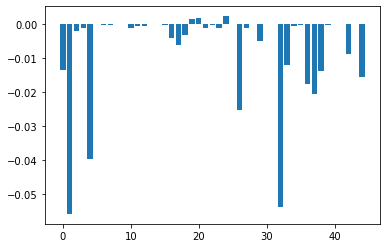

In [104]:
print(X.head(5))
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [140]:
corr = X.corr()
corr["ChurnFlag"].sort_values(ascending=False)

ChurnFlag                                      1.000000
ProfitSegment                                  0.119418
ClosedProductNumL3M                            0.083144
ValueBasedSegment                              0.042577
ClosedCreditCardFlag                           0.040596
ClosedPayrollDurationMonthL12M                 0.036551
AvgDemandDepositTrxUsdAmountL6M               -0.001801
DemandDepositBalanceDebtRatioLM6              -0.004481
ClosedOverdraftDurationMonthL12M              -0.005343
SumUsdAum                                     -0.007413
MaxUsdAumL24M                                 -0.007453
AvgFxDemandDepositTrxUsdAmountL6M             -0.007456
AvgFxDemandDepositTrxUsdAmountL3M             -0.007468
AvgUsdAumL3M                                  -0.008408
AvgUsdAumL6M                                  -0.009405
AvgDemandDepositTrxNumL6M                     -0.010214
YearlyIncome                                  -0.010426
AvgBranchTrxNumL6M                            -0